In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

In [2]:
notlar = pd.read_csv("statesinterpolate_linear_all.csv")
notlar.head()

,Unnamed: 0,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,4,1996_ALABAMA,ALABAMA,1996,735912.0,3365113.0,334858.0,2138717.0,891538.0,3572283.0,...,57098.0,58305.0,42510.0,469370.0,207980.0,686983.0,211.646974,256.594863,210.920767,260.276441
1,5,1997_ALABAMA,ALABAMA,1997,737386.0,3981788.0,376200.0,2498847.0,1106741.0,3963624.0,...,57431.0,58210.0,44272.0,472847.0,208148.0,690881.0,213.220493,257.985699,209.910583,259.901646
2,6,1998_ALABAMA,ALABAMA,1998,739321.0,4140537.0,374153.0,2589819.0,1176565.0,4245033.0,...,58610.0,57105.0,43957.0,473954.0,205630.0,689925.0,214.794013,259.376534,208.900399,259.526850
3,7,1999_ALABAMA,ALABAMA,1999,737639.0,4471546.0,393095.0,2752653.0,1325798.0,4622810.0,...,60012.0,56201.0,42576.0,472019.0,202045.0,684612.0,216.367533,260.767370,207.890214,259.152054
4,8,2000_ALABAMA,ALABAMA,2000,730184.0,4885917.0,425978.0,3003814.0,1456125.0,5003267.0,...,59749.0,56951.0,42512.0,472686.0,201358.0,684880.0,217.941053,262.158206,206.880030,258.777258


In [3]:
notlar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049 entries, 0 to 1048
Data columns (total 26 columns):
Unnamed: 0                      1049 non-null int64
PRIMARY_KEY                     1049 non-null object
STATE                           1049 non-null object
YEAR                            1049 non-null int64
ENROLL                          1049 non-null float64
TOTAL_REVENUE                   1049 non-null float64
FEDERAL_REVENUE                 1049 non-null float64
STATE_REVENUE                   1049 non-null float64
LOCAL_REVENUE                   1049 non-null float64
TOTAL_EXPENDITURE               1049 non-null float64
INSTRUCTION_EXPENDITURE         1049 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1049 non-null float64
OTHER_EXPENDITURE               1049 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1049 non-null float64
GRADES_PK_G                     1049 non-null float64
GRADES_KG_G                     1049 non-null float64
GRADES_4_G                      104

In [4]:
notlar['SCORE_MEAN']=(notlar['GRADES_4_G']*((notlar['AVG_MATH_4_SCORE']+notlar['AVG_READING_4_SCORE'])/2)+notlar['GRADES_8_G']*((notlar['AVG_MATH_8_SCORE']+notlar['AVG_READING_8_SCORE'])/2))/(notlar['GRADES_4_G']+notlar['GRADES_8_G'])

In [5]:
notlar.head()

,Unnamed: 0,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,...,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,SCORE_MEAN
0,4,1996_ALABAMA,ALABAMA,1996,735912.0,3365113.0,334858.0,2138717.0,891538.0,3572283.0,...,58305.0,42510.0,469370.0,207980.0,686983.0,211.646974,256.594863,210.920767,260.276441,235.106342
1,5,1997_ALABAMA,ALABAMA,1997,737386.0,3981788.0,376200.0,2498847.0,1106741.0,3963624.0,...,58210.0,44272.0,472847.0,208148.0,690881.0,213.220493,257.985699,209.910583,259.901646,235.414183
2,6,1998_ALABAMA,ALABAMA,1998,739321.0,4140537.0,374153.0,2589819.0,1176565.0,4245033.0,...,57105.0,43957.0,473954.0,205630.0,689925.0,214.794013,259.376534,208.900399,259.526850,235.339875
3,7,1999_ALABAMA,ALABAMA,1999,737639.0,4471546.0,393095.0,2752653.0,1325798.0,4622810.0,...,56201.0,42576.0,472019.0,202045.0,684612.0,216.367533,260.767370,207.890214,259.152054,235.260029
4,8,2000_ALABAMA,ALABAMA,2000,730184.0,4885917.0,425978.0,3003814.0,1456125.0,5003267.0,...,56951.0,42512.0,472686.0,201358.0,684880.0,217.941053,262.158206,206.880030,258.777258,235.863027


2. soru

In [6]:
notlarexpenditure = notlar.iloc[:,10:14]
notlarexpenditureonly = notlar.iloc[:,10:14]
notlarexpenditure['SCORE_MEAN']=(notlar['GRADES_4_G']*((notlar['AVG_MATH_4_SCORE']+notlar['AVG_READING_4_SCORE'])/2)+notlar['GRADES_8_G']*((notlar['AVG_MATH_8_SCORE']+notlar['AVG_READING_8_SCORE'])/2))/(notlar['GRADES_4_G']+notlar['GRADES_8_G'])
notlarexp_korelasyon = notlarexpenditure.corr()
notlarexp_korelasyon

,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,SCORE_MEAN
INSTRUCTION_EXPENDITURE,1.000000,0.975905,0.907243,0.888556,0.106009
SUPPORT_SERVICES_EXPENDITURE,0.975905,1.000000,0.953618,0.912484,0.098654
OTHER_EXPENDITURE,0.907243,0.953618,1.000000,0.923895,0.027757
CAPITAL_OUTLAY_EXPENDITURE,0.888556,0.912484,0.923895,1.000000,0.010862
SCORE_MEAN,0.106009,0.098654,0.027757,0.010862,1.000000


SCORE_MEAN- SUPPORT_SERVICES_EXPENDITURE kolerasyonu diğerlerine göre en yüksektir.

3. soru PCA

In [7]:
X = StandardScaler().fit_transform(notlarexpenditureonly)

In [8]:
Xt = X.T
Cx = np.cov(Xt)
print('Kovaryans matrisi :\n', Cx)

Kovaryans matrisi :
 [[1.0009542  0.97683619 0.90810872 0.88940428]
 [0.97683619 1.0009542  0.95452829 0.91335486]
 [0.90810872 0.95452829 1.0009542  0.92477608]
 [0.88940428 0.91335486 0.92477608 1.0009542 ]]


In [9]:
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].T
    print('Özvektör {}: \n{}'.format(i + 1, eigvec_cov))
    print('Özdeğer  {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'Verikümesindeki toplam varyans yüzdesi',
    'Elle hesaplanan bileşen.\n',
    eig_val_cov / sum(eig_val_cov)
)

Özvektör 1: 
[-0.4988561  -0.50816927 -0.50050258 -0.49234515]
Özdeğer  1: 3.7849289207368697
----------------------------------------
Özvektör 2: 
[-0.52336128  0.78854394 -0.32021075  0.04191058]
Özdeğer  2: 0.013553016073468552
----------------------------------------
Özvektör 3: 
[-0.59185268 -0.33078461  0.2435298   0.69353095]
Özdeğer  3: 0.13104421030937263
----------------------------------------
Özvektör 4: 
[ 0.35629478 -0.10268389 -0.7665869   0.52426575]
Özdeğer  4: 0.07429064677342051
----------------------------------------
Verikümesindeki toplam varyans yüzdesi Elle hesaplanan bileşen.
 [0.9453302  0.00338502 0.03272982 0.01855496]


Toplam varyansın %94ü ilk bileşen tarafından açıklanabilmektedir

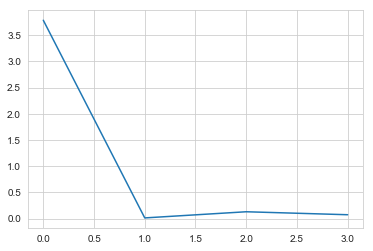

[3.78492892 0.01355302 0.13104421 0.07429065]


In [10]:
plt.plot(eig_val_cov)
plt.show()

print(eig_val_cov)

In [13]:
sklearn_pca = PCA(n_components=1)
Y_sklearn = sklearn_pca.fit_transform(X)

In [14]:
Y_sklearn

array([[-0.90148048],
       [-0.82758676],
       [-0.76507419],
       ...,
       [-1.22525352],
       [-1.20433491],
       [-1.20433491]])

4. soru

In [15]:
notlarexpenditure['VALUE']=Y_sklearn

In [16]:
notlarexpenditure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049 entries, 0 to 1048
Data columns (total 6 columns):
INSTRUCTION_EXPENDITURE         1049 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1049 non-null float64
OTHER_EXPENDITURE               1049 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1049 non-null float64
SCORE_MEAN                      1049 non-null float64
VALUE                           1049 non-null float64
dtypes: float64(6)
memory usage: 49.2 KB


In [17]:
notdeger = notlarexpenditure.iloc[:,4:6]

In [26]:
notdeger.corr()


,SCORE_MEAN,VALUE
SCORE_MEAN,1.000000,0.062871
VALUE,0.062871,1.000000


In [ ]:
5. soru: ederdim çünkü expenditure degerlerindeyken de score mean ile arasındakı kolerasyon 0.1 en fazla , düşük. Bunu da koysam farketmeyecektir.